In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras import datasets

In [3]:
#import CIFAR10 data from tensorflow:
(x_train , y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train = y_train.reshape(-1,)
y_train
#Converting 2D Array To 1D array

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile" , "bird", "cat" ,"deer" , "dog" ,"frog","horse" , "ship" , "truck"]

def show_sample_img(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])    

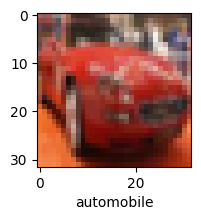

In [8]:
show_sample_img(x_train,y_train,5)

In [9]:
#Applying Feature Scaling:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
from keras import Sequential
from keras.layers import Dense , Flatten

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
ann = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(3000 , activation='relu'),
    Dense(1000 , activation='relu'),
    Dense(10 , activation='sigmoid'),
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.8104 - accuracy: 0.3556
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.6214 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5416 - accuracy: 0.4562
Epoch 4/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4839 - accuracy: 0.4759
Epoch 5/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4343 - accuracy: 0.4932


In [17]:
from keras.layers import Conv2D , MaxPooling2D

In [20]:
#Building Model using CNN:
cnn = Sequential([
    #cnn
    Conv2D(filters=32 , kernel_size = (3,3) , activation='relu' , input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    
    ##kernel size refers to the size of the filter we are going to use
    ##max pooling layer (2,2) represnts size of pooling
    
    Conv2D(filters=64 , kernel_size = (3,3) , activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64 , activation='relu'),
    Dense(10 , activation='softmax'),
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4636 - accuracy: 0.4714
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1024 - accuracy: 0.6138
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9669 - accuracy: 0.6628
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8771 - accuracy: 0.6956
Epoch 5/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8107 - accuracy: 0.7174


In [21]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8954 - accuracy: 0.6887


[0.8954443335533142, 0.6887000203132629]

In [22]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [28]:
y_predicted = cnn.predict(x_test)
y_predicted.shape

313/313 [==============================] - 2s 5ms/step


(10000, 10)

In [29]:
y_predicted.reshape(-1,)
y_predicted

array([[1.19325295e-02, 1.06397981e-03, 5.00308275e-02, ...,
        2.18608556e-03, 1.31011650e-01, 3.92563030e-04],
       [2.95682680e-02, 3.71022075e-01, 1.36120652e-04, ...,
        5.84378586e-06, 5.96460819e-01, 2.73204688e-03],
       [7.47808218e-02, 3.24041098e-01, 1.18949404e-02, ...,
        4.02198732e-03, 4.04167414e-01, 1.37377173e-01],
       ...,
       [1.36983552e-04, 7.10839231e-06, 6.25981838e-02, ...,
        1.49237728e-02, 1.75483729e-04, 2.14354750e-05],
       [1.37868337e-02, 1.42421145e-02, 1.98768210e-02, ...,
        8.47831136e-04, 4.25487699e-04, 1.40052784e-04],
       [1.35155078e-05, 7.86474538e-06, 1.49321172e-03, ...,
        9.78347182e-01, 3.04015566e-06, 1.06415882e-05]], dtype=float32)

In [45]:
def check_results(index):
    y_p = np.argmax(y_predicted[index])
    print(f'predicted value : {y_p}  \nactual value : {y_test[index]}')
    print(f'predicted object : {classes[y_p]}')
    print("Actual object:")
    plt.figure(figsize=(15,2))
    plt.xlabel(classes[y_test[index]])
    plt.imshow(x_test[index])

predicted value : 1  
actual value : 1
predicted object : automobile
Actual object:


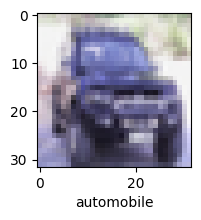

In [46]:
check_results(9)

predicted value : 0  
actual value : 0
predicted object : airplane
Actual object:


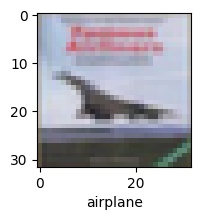

In [47]:
check_results(3)

predicted value : 5  
actual value : 5
predicted object : dog
Actual object:


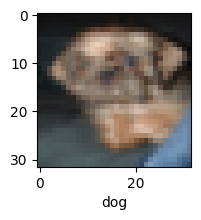

In [48]:
check_results(155)